In [2]:
import ast
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
table = np.genfromtxt('../output/table.txt')

In [4]:
with open('../output/clustered_data.txt') as f:
    df = pd.read_csv(f, sep='\t', index_col=0)

In [5]:
clusters = {}
for i in range(len(df)):
    key = df.iloc[i].name
    val = np.array(ast.literal_eval(df.iloc[i].values[0])) - 1
    clusters[key] = val

In [6]:
# Create overlay image
overlay = np.zeros(table.shape + (4,))

In [7]:
# Create overlay of clusters
for key, value in clusters.items():
    if len(value) == 1:
        color = [1,1,1,1]
    else:
        color = [np.random.random() for i in range(3)] + [0.5,]
    for px in value:
        x = px[0]
        y = px[1]
        overlay[x][y] = color

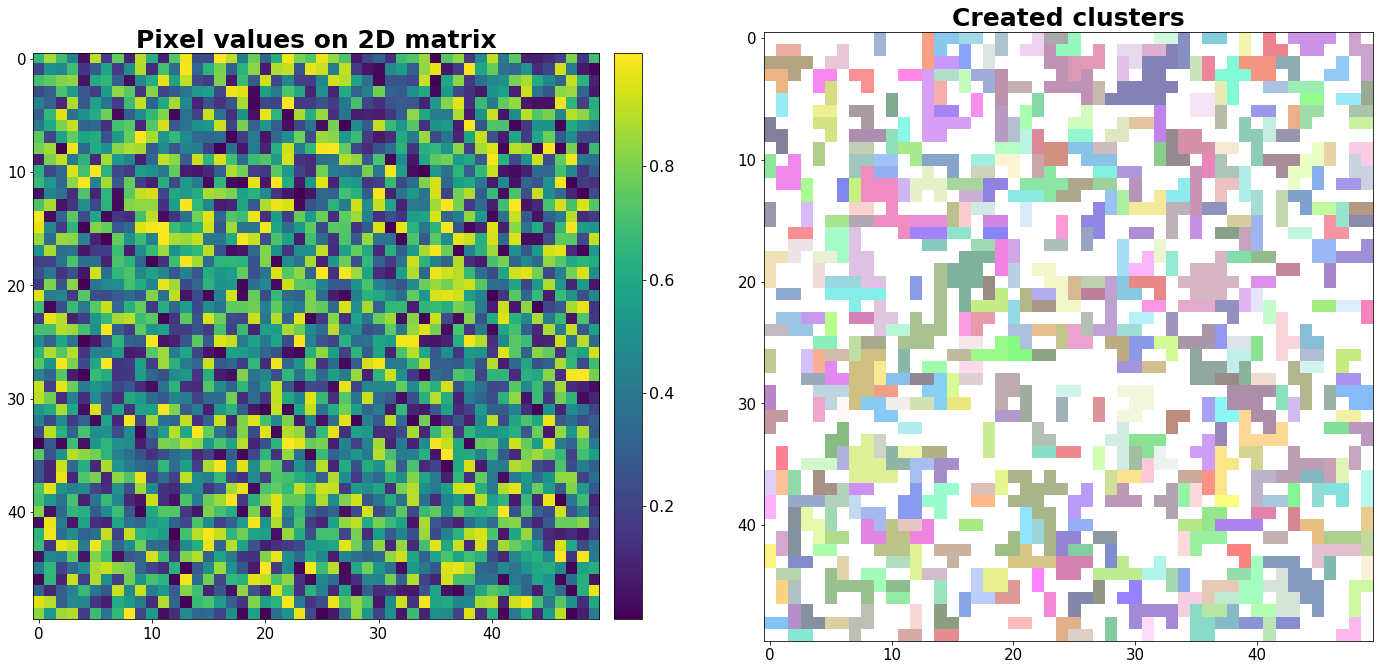

In [8]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*12, nrows*12))

axistitlesize = 25
axisticksize = 15
axiscolorbarsize = 16

_map = axes[0].imshow(table, cmap='viridis')
axes[0].set_title('Pixel values on 2D matrix', fontsize=axistitlesize, fontweight='bold')

axes[1].imshow(overlay)
axes[1].set_title('Created clusters', fontsize=axistitlesize, fontweight='bold')

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=axisticksize)

# Add colorbar
# Create an axis on the right side of 'axes'
divider = make_axes_locatable(axes[0])
cax = divider.append_axes('right', size='5%', pad=0.2)
cb = plt.colorbar(mappable=_map, cax=cax)
cb.ax.tick_params(labelsize=axiscolorbarsize)

plt.show()